In [4]:
# Linear Regression example
"""
    from the youtube video https://www.youtube.com/watch?v=Xiab2JhwzYY&t=172s
"""

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%config InlineBackend.figure_format = 'svg'

In [5]:
learning_rate = 0.01
epochs = 200

In [12]:
n_samples = 30
train_x = np.linspace(0, 20, n_samples)
train_y = 3 * train_x + 4 * np.random.randn(n_samples)


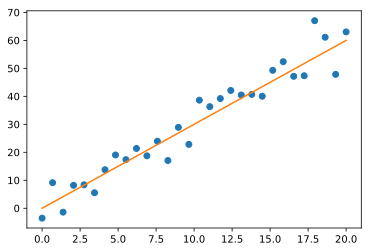

In [13]:
plt.plot(train_x, train_y, 'o')
plt.plot(train_x, 3*train_x)
plt.show()

In [17]:
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W = tf.Variable(np.random.randn(), name='weights')
B = tf.Variable(np.random.rand(), name='bias')

In [22]:
# pred = X * W + B
pred = tf.add(tf.multiply(X,W),B)

cost = tf.reduce_sum((pred - Y)**2)/ (2 * n_samples)

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [23]:
init = tf.global_variables_initializer()

epoch: 0000 c=47.8994 W=2.2914 b=0.8571
epoch: 0020 c=12.3208 W=3.0107 b=0.8674
epoch: 0040 c=12.3080 W=3.0138 b=0.8197
epoch: 0060 c=12.2965 W=3.0167 b=0.7743
epoch: 0080 c=12.2861 W=3.0195 b=0.7313
epoch: 0100 c=12.2767 W=3.0221 b=0.6904
epoch: 0120 c=12.2682 W=3.0246 b=0.6516
epoch: 0140 c=12.2605 W=3.0270 b=0.6148
epoch: 0160 c=12.2536 W=3.0293 b=0.5799
epoch: 0180 c=12.2473 W=3.0314 b=0.5467


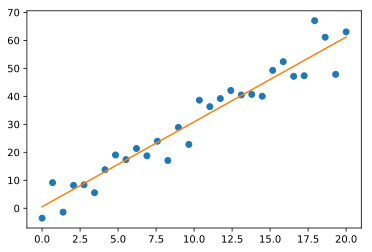

In [32]:
with tf.Session() as sesh: 
    sesh.run(init)
    for epoch in range(epochs):
        for x,y in zip(train_x, train_y):
            sesh.run(optimizer, feed_dict={X:x, Y:y})
            
        if not epoch % 20: # for every 20th epoch
            c = sesh.run(cost, feed_dict={X:train_x, Y:train_y})
            w = sesh.run(W)
            b = sesh.run(B)
            print(f'epoch: {epoch:04d} c={c:.4f} W={w:.4f} b={b:.4f}')
            
    weight = sesh.run(W)
    bias = sesh.run(B)

    plt.plot(train_x, train_y, 'o')
    plt.plot(train_x, weight * train_x + b)
    plt.show()